## Get all the essential packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Import the dataset

In [ ]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Dropping off some variables which will not be very significant in segmentation

In [ ]:
data.drop("CustomerID", axis=1, inplace = True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Taking care of categorical variables

In [ ]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## Applying Elbow analysis for finding out value of k

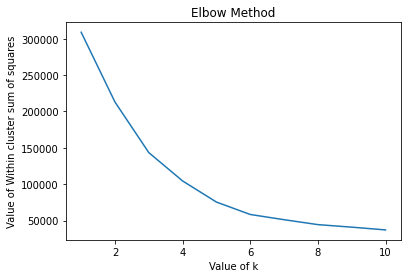

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Elbow Method")
plt.show()

## Applying the clustering with analysed value of k = 5

In [ ]:
kmeans = KMeans(n_clusters= 5)
y_kmeans = kmeans.fit_predict(data)

## Visualizing the clustering

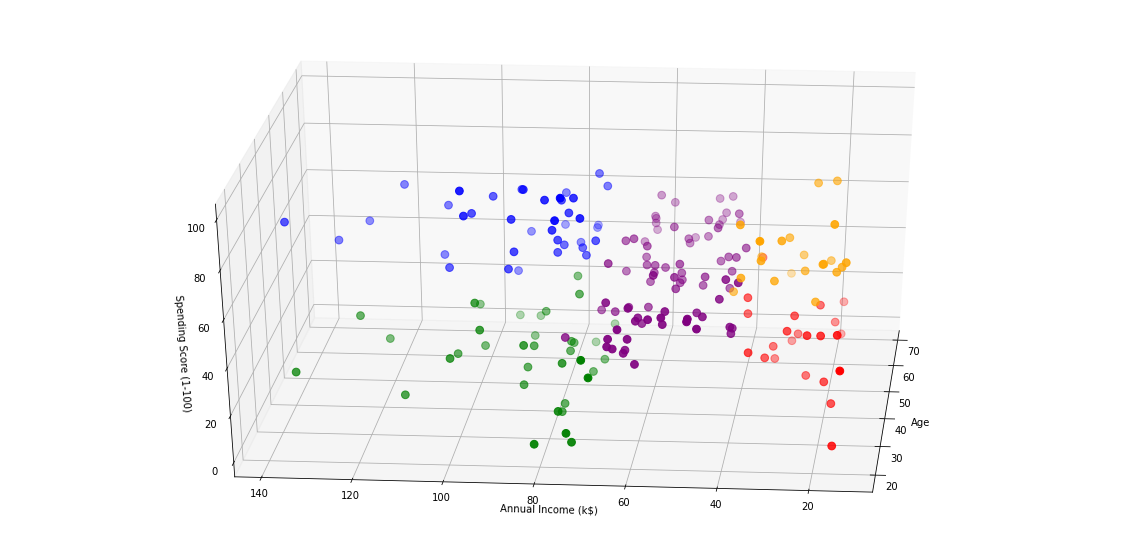

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[kmeans.labels_ == 0], data["Annual Income (k$)"][kmeans.labels_ == 0], data["Spending Score (1-100)"][kmeans.labels_ == 0], c='blue', s=60)
ax.scatter(data.Age[kmeans.labels_ == 1], data["Annual Income (k$)"][kmeans.labels_ == 1], data["Spending Score (1-100)"][kmeans.labels_ == 1], c='red', s=60)
ax.scatter(data.Age[kmeans.labels_ == 2], data["Annual Income (k$)"][kmeans.labels_ == 2], data["Spending Score (1-100)"][kmeans.labels_ == 2], c='green', s=60)
ax.scatter(data.Age[kmeans.labels_ == 3], data["Annual Income (k$)"][kmeans.labels_ == 3], data["Spending Score (1-100)"][kmeans.labels_ == 3], c='orange', s=60)
ax.scatter(data.Age[kmeans.labels_ == 4], data["Annual Income (k$)"][kmeans.labels_ == 4], data["Spending Score (1-100)"][kmeans.labels_ == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## **Looking at the analysis cluster 5 (purple color) are the people who earn high as well as spend high. Also cluster 2 (red color) people spend high but their income is less. Also cluster 1 (blue color) are kind of people who earn less and spend less. For these three classes of people some discount offers can be generated to aim growth in sales.Apart from this cluster 3 people earn high but do spend less. This is a point of concern for management. The reasons for this needs to be found out. It might be products at store , discounts , service etc. Once valid reasons found out management can incorporate solutions for rectifying it which might result in profits.** 
